In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.filters import *

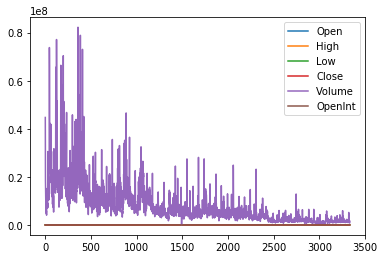

In [69]:
data = pd.read_csv("Stocks/googl.us.txt")
data.plot()
plt.show()

In [70]:
result = adfuller(data.Close, regression='ctt')

In [71]:
print("ADF Statistics: %.8f"%result[0])
print("p value: %.8f"%result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistics: -3.39066233
p value: 0.14315063
Critical Values:
	1%: -4.375
	5%: -3.834
	10%: -3.554


In [72]:
print(result)

(-3.390662326268666, 0.14315063388489385, 29, 3303, {'1%': -4.374641678777733, '5%': -3.8341791287474494, '10%': -3.55436844938191}, 21825.077070780273)


In [73]:
from statsmodels.tsa.filters.bk_filter import bkfilter

result_bk = bkfilter(data.Close, low = 1.5, high = 8, K = 3)

In [88]:
import matplotlib.pyplot as plt
def plot_result(result, show = True):
    fig, ax = plt.subplots()
    result.plot(ax=ax, style=['r--', 'b-'])
    if show:
        plt.show()

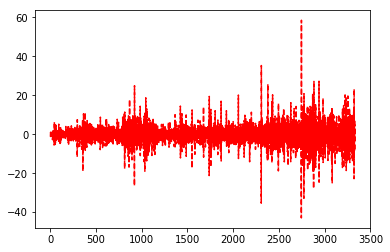

In [75]:
plot_result(result_bk)

In [76]:
results_hp = hp_filter.hpfilter(data.Close, 1600)
# Results look irrelevant

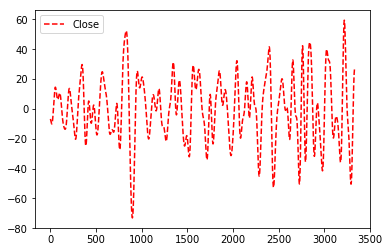

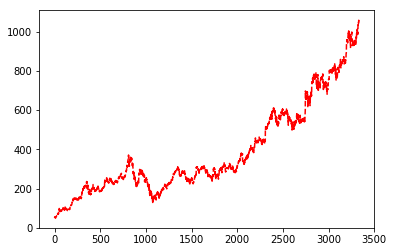

In [91]:
results_cf = cf_filter.cffilter(data.Close, low = 50, high=300, drift = True)
cycles, trend = results_cf
plot_result(pd.DataFrame(cycles), show = False)
plot_result(data.Close)